<a href="https://colab.research.google.com/github/hui09241/GRU_test/blob/master/GRU_0902_4_88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pydrive
!pip install scikit-learn==0.20.0
!pip show scikit-learn # to see which version and where scikit-learn is installed
!pip freeze # to see all packages installed in the active virtualenv
"import sklearn; sklearn.show_versions()"

Name: scikit-learn
Version: 0.20.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, numpy
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute
absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.2.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.2.0
blis==0.4.1
bokeh==2.1.1
boto==2.49.0
boto3==1.14.63
botocore==1.17.63
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.2
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3

'import sklearn; sklearn.show_versions()'

In [3]:
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization #這行milk02.ipynb
from keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error  #02.ipynb

import pandas as pd
from pydrive.auth import GoogleAuth #雲端部分#載入資料用
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

#把要one hot的類別轉換成數字                           #從這以下milk02.ipynb
from sklearn.preprocessing import LabelEncoder

#把要的類別轉換成one hot
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.optimizers import Adam

from sklearn.model_selection import KFold

In [4]:
##載入new_train
auth.authenticate_user()                  
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '11jLvYsp8RkDqZioXL5j2Qitx7C2lwM79'  #雲端硬碟檔案連結碼
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('our_new_train.csv')
new_train = pd.read_csv('our_new_train.csv', sep=',')
#new_train

In [5]:
##載入new_test
auth.authenticate_user()                  
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1pQC3R9smKnmsqQEU3BUoWVmEk7YRK5Io'  #雲端硬碟檔案連結碼
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('newtest17.csv')
new_test = pd.read_csv('newtest17.csv', sep=',')
#print(new_test.loc[[48]])
#new_test

In [6]:
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1TgijKpsq6haP2C6yHsA7_bVtf5Ra6Cps'  #雲端硬碟檔案連結碼
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('spec01.csv')
spec = pd.read_csv('spec01.csv',sep=',')
#print(spec)

In [7]:
for i in range(len(spec['7'])):
    if(str(spec['7'][i])==str("A")):
          spec['7'][i]=1
for i in range(len(spec['7'])):
    if(str(spec['7'][i])==str('B')):
          spec['7'][i]=2
for i in range(len(spec['7'])):
    if(str(spec['7'][i])==str('C')):
          spec['7'][i]=3
#spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [8]:
#測試spec
#spec.loc[[4290]]

In [9]:
new_train=pd.DataFrame(data=new_train,columns=['ID','firm','CowID','MomID','DadID','BabyNum','FeedDay','Milk','Sampling date','Age','BreedNum','Temperature','T Max','RH','RHMin','Precp','THI','cycle','tcalving number','disease','Sampling D Year','Sampling D Month'])
#new_train

In [10]:
new_test=pd.DataFrame(data=new_test,columns=['ID','firm','CowID','MomID','DadID','BabyNum','FeedDay','Milk','Sampling date','Age','BreedNum','Temperature','T Max','RH','RHMin','Precp','THI','cycle','tcalving number','disease','Sampling D Year','Sampling D Month'])
#new_test

In [11]:
new_train['Milk']

0        20.0
1        43.0
2        24.0
3        18.2
4        10.0
         ... 
30009    24.0
30010    20.4
30011    19.0
30012     NaN
30013    25.5
Name: Milk, Length: 30014, dtype: float64

In [12]:
import math
bool = False
for i in range(len(new_train['Milk'])):
    bool = False
    bool=math.isnan(new_train['Milk'][i])
    if(bool):
       new_train['Milk'][i]=0
#print(new_train['Milk'].loc[[15]])
#print(new_train['Milk'].loc[[16]])
#new_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [13]:
import math
bool = False
for i in range(len(new_test['Milk'])):
    bool = False
    bool=math.isnan(new_test['Milk'][i])
    if(bool):
       new_test['Milk'][i]=0
#print(new_train['Milk'].loc[[15]])
#print(new_test['Milk'].loc[[9]])
#new_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
#train有不需要判斷的編號就去掉
for i in range(len(new_test['CowID'])):
    if len(new_train.index[new_train['CowID'] == new_test['CowID'][i]]) == 0:
        new_train=new_train.drop([i])
new_train.reset_index(inplace=True)
#new_train

In [15]:
#train牛乳產量是0，則丟棄不用
for i in range(len(new_train['Milk'])): 
    if new_train['Milk'][i] == 0 :
        new_train = new_train.drop([i])
new_train.reset_index(inplace=True)
#new_train

In [16]:
#test牛乳產量是0，則丟棄不用(未來測試需要)
for i in range(len(new_test['Milk'])): 
    if new_test['Milk'][i] == 0 :
        new_test = new_test.drop([i])
new_test.reset_index(inplace=True)
print(new_test['Milk'].loc[[9]])
new_test

9    11.6
Name: Milk, dtype: float64


,index,ID,firm,CowID,MomID,DadID,BabyNum,FeedDay,Milk,Sampling date,Age,BreedNum,Temperature,T Max,RH,RHMin,Precp,THI,cycle,tcalving number,disease,Sampling D Year,Sampling D Month
0,0,18072,2,122630,98111436.0,007HO08361,3,183,40.0,2017/1/19,70,2,20.8,25.5,85.0,69.0,0.0,20.236278,NaN,NaN,NaN,NaN,NaN
1,1,15357,2,2122398,98111423.0,7H7536,3,71,28.0,2017/7/18,50,0,NaN,35.2,82.0,69.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,37069,3,99183211,94172172.0,1H8328,1,365,12.0,2013/6/25,38,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,17574,2,122607,98115809.0,029HO11295,4,177,35.0,2017/3/20,73,1,24.3,29.1,81.0,65.0,0.0,23.221440,NaN,NaN,NaN,NaN,NaN
4,4,3256,1,1051850,96040547.0,7H9502,1,42,28.8,2015/2/5,28,0,10.4,11.1,71.0,55.0,3.5,10.980262,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6678,7496,11987,2,1123347,99116307.0,7H8361,3,18,39.0,2015/8/20,42,0,31.0,34.9,82.0,61.0,0.0,29.323086,NaN,NaN,NaN,NaN,NaN
6679,7497,23863,2,99127667,NaN,200H1715,2,508,10.0,2014/7/21,52,4,31.5,34.8,72.0,54.0,0.0,28.814617,NaN,NaN,NaN,NaN,NaN
6680,7498,24192,2,97124147,NaN,7H6155,3,158,30.6,2013/5/27,62,1,29.3,34.4,75.0,51.0,0.0,27.200232,NaN,NaN,NaN,NaN,NaN
6681,7500,14623,2,2122364,95110600.0,29H10124,1,9,20.0,2014/12/25,22,0,16.9,19.5,80.0,60.0,5.5,16.578618,NaN,NaN,NaN,NaN,NaN


In [17]:
#處理new_train的
#父親精液編號 
new_train['DadID']=new_train['DadID'].fillna("NoData").astype("str")

#將MomID中沒有編號的打為NoData 
new_train['MomID']=new_train['MomID'].fillna("NoData").astype("str")

avg_Temperature_tr=new_train['Temperature'].mean() #將平均溫度Nan部分以算術平均數之平均溫度取代
new_train['Temperature']= new_train['Temperature'].fillna(avg_Temperature_tr)


avg_T_Max_tr=new_train['T Max'].mean()          #將最高溫度Nan部分以算術平均數之最高溫度取代
new_train['T Max']= new_train['T Max'].fillna(avg_T_Max_tr)


avg_RH_tr=new_train['RH'].mean()                  #將相對濕度Nan部分以算術平均數之相對濕度取代
new_train['RH']= new_train['RH'].fillna(avg_RH_tr)


avg_RH_Min_tr=new_train['RHMin'].mean()         #將最小相對濕度Nan部分以算術平均數之最小相對濕度取代
new_train['RHMin']= new_train['RHMin'].fillna(avg_RH_Min_tr)


avg_Precp_tr=new_train['Precp'].mean()          #將降水量Nan部分以算術平均數之降水量取代
new_train['Precp']= new_train['Precp'].fillna(avg_Precp_tr)

avg_THI_tr=new_train['THI'].mean()          #將THI Nan部分以算術平均數之THI取代
new_train['THI']= new_train['THI'].fillna(avg_THI_tr)

new_train.dropna(subset=['FeedDay','DadID','MomID'], inplace=True)
#new_train

In [18]:
#處理new_test的
#父親精液編號
new_test['DadID']=new_test['DadID'].fillna("NoData").astype("str")

#將MomID中沒有編號的打為NoData 
new_test['MomID']=new_test['MomID'].fillna("NoData").astype("str")

avg_Temperature=new_test['Temperature'].mean() #將平均溫度Nan部分以算術平均數之平均溫度取代
new_test['Temperature']= new_test['Temperature'].fillna(avg_Temperature)


avg_T_Max=new_test['T Max'].mean()          #將最高溫度Nan部分以算術平均數之最高溫度取代
new_test['T Max']= new_test['T Max'].fillna(avg_T_Max)


avg_RH=new_test['RH'].mean()                  #將相對濕度Nan部分以算術平均數之相對濕度取代
new_test['RH']= new_test['RH'].fillna(avg_RH)


avg_RH_Min=new_test['RHMin'].mean()         #將最小相對濕度Nan部分以算術平均數之最小相對濕度取代
new_test['RHMin']= new_test['RHMin'].fillna(avg_RH_Min)


avg_Precp=new_test['Precp'].mean()          #將降水量Nan部分以算術平均數之降水量取代
new_test['Precp']= new_test['Precp'].fillna(avg_Precp)

avg_THI=new_test['THI'].mean()          #將THI Nan部分以算術平均數之THI取代
new_test['THI']= new_test['THI'].fillna(avg_THI)
#
#new_test


In [19]:
from datetime import datetime
for i in range(len(new_train['Sampling date'])):
          sdate=datetime.strptime(new_train['Sampling date'][i], "%Y/%m/%d")
          new_train['Sampling D Year'][i]= sdate.year
          new_train['Sampling D Month'][i]= sdate.month
#new_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
for i in range(len(new_test['Sampling date'])):
          sdate=datetime.strptime(new_test['Sampling date'][i], "%Y/%m/%d")
          new_test['Sampling D Year'][i]= sdate.year
          new_test['Sampling D Month'][i]= sdate.month
#new_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
#new_train把當月有病的標記起來(為1)
for i in range(len(spec)):
    dd=datetime.strptime(spec['4'][i], "%Y/%m/%d %H:%M")
    if len(new_train.index[new_train['CowID'] == spec['1'][i]])>0:
        for j in new_train.index[new_train['CowID'] == spec['1'][i]]:
            if new_train['Sampling D Year'][j] == dd.year and new_train['Sampling D Month'][j] == dd.month and new_train['firm'][j]==spec['7'][i]:
                new_train['disease'][j] = 1
                #print(j,new_train['CowID'][j],new_train['Sampling D Year'][j],new_train['Sampling D Month'][j])

#new_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
#new_test把當月有病的標記起來(為1)
for i in range(len(spec)):
    dd=datetime.strptime(spec['4'][i], "%Y/%m/%d %H:%M")
    if len(new_test.index[new_test['CowID'] == spec['1'][i]])>0:
        for j in new_test.index[new_test['CowID'] == spec['1'][i]]:
            if new_test['Sampling D Year'][j] == dd.year and new_test['Sampling D Month'][j] == dd.month and new_test['firm'][j]==spec['7'][i]:
                new_test['disease'][j] = 1
                #print(j,new_test['CowID'][j],new_test['Sampling D Year'][j],new_test['Sampling D Month'][j])

#new_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [23]:
new_train=new_train.fillna(0)
new_test=new_test.fillna(0)
new_train.reset_index(inplace=True,drop=True)

In [24]:
#new_train

In [25]:
#改new_train
i=0
#for i in range(len(new_train['Sampling D Month'])):
#          if int(new_train['Sampling D Month'][i]) >=3 and int(new_train['Sampling D Month'][i])<=5:
#              new_train['Sampling D Month'][i] = "Spring"
#          elif int(new_train['Sampling D Month'][i]) >=6 and int(new_train['Sampling D Month'][i])<=8:
#              new_train['Sampling D Month'][i] = "Summer"
#          elif int(new_train['Sampling D Month'][i]) >=9 and int(new_train['Sampling D Month'][i])<=11:
#              new_train['Sampling D Month'][i] = "Autumn"
#          else:
#              new_train['Sampling D Month'][i] = "Winter"   
#改new_train的feedday以及babynum
for i in range(len(new_train['ID'])):
    if int(new_train['FeedDay'][i]) <=100:
        new_train['cycle'][i] = 0
    elif int(new_train['FeedDay'][i]) >=101 and int(new_train['FeedDay'][i]) <=200 :
        new_train['cycle'][i] = 1
    elif int(new_train['FeedDay'][i]) >=201 and int(new_train['FeedDay'][i]) <=305:
        new_train['cycle'][i] = 2
    else:
        new_train['cycle'][i] = 3

    if int(new_train['BabyNum'][i]) <=2:
        new_train['tcalving number'][i] = 0
    elif int(new_train['BabyNum'][i])>=7:
        new_train['tcalving number'][i] = 2
    else:
        new_train['tcalving number'][i] = 1

#new_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: Settin

In [26]:
#改new_test
i=0
#for i in range(len(new_test['Sampling D Month'])):
#          if int(new_test['Sampling D Month'][i]) >=3 and int(new_test['Sampling D Month'][i])<=5:
#              new_test['Sampling D Month'][i] = "Spring"
#          elif int(new_test['Sampling D Month'][i]) >=6 and int(new_test['Sampling D Month'][i])<=8:
#              new_test['Sampling D Month'][i] = "Summer"
#          elif int(new_test['Sampling D Month'][i]) >=9 and int(new_test['Sampling D Month'][i])<=11:
#              new_test['Sampling D Month'][i] = "Autumn"
#          else:
#              new_test['Sampling D Month'][i] = "Winter"
#改new_test的feedday以及babynum
for i in range(len(new_test['ID'])):
    if int(new_test['FeedDay'][i]) <=100:
        new_test['cycle'][i] = 0
    elif int(new_train['FeedDay'][i]) >=101 and int(new_test['FeedDay'][i]) <=200 :
        new_test['cycle'][i] = 1
    elif int(new_test['FeedDay'][i]) >=201 and int(new_test['FeedDay'][i]) <=305:
        new_test['cycle'][i] = 2
    else:
        new_test['cycle'][i] = 2
    if int(new_test['BabyNum'][i]) <=2:
        new_test['tcalving number'][i] = 0
    elif int(new_test['BabyNum'][i])>=7:
        new_test['tcalving number'][i] = 2
    else:
        new_test['tcalving number'][i] = 1    
new_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: Settin

,index,ID,firm,CowID,MomID,DadID,BabyNum,FeedDay,Milk,Sampling date,Age,BreedNum,Temperature,T Max,RH,RHMin,Precp,THI,cycle,tcalving number,disease,Sampling D Year,Sampling D Month
0,0,18072,2,122630,98111436.0,007HO08361,3,183,40.0,2017/1/19,70,2,20.800000,25.500000,85.00000,69.000000,0.000000,20.236278,2.0,1.0,0.0,2017.0,1.0
1,1,15357,2,2122398,98111423.0,7H7536,3,71,28.0,2017/7/18,50,0,23.953353,35.200000,82.00000,69.000000,0.000000,22.838761,0.0,1.0,0.0,2017.0,7.0
2,2,37069,3,99183211,94172172.0,1H8328,1,365,12.0,2013/6/25,38,5,23.953353,27.808703,78.38099,59.814749,4.851584,22.838761,2.0,0.0,0.0,2013.0,6.0
3,3,17574,2,122607,98115809.0,029HO11295,4,177,35.0,2017/3/20,73,1,24.300000,29.100000,81.00000,65.000000,0.000000,23.221440,1.0,1.0,0.0,2017.0,3.0
4,4,3256,1,1051850,96040547.0,7H9502,1,42,28.8,2015/2/5,28,0,10.400000,11.100000,71.00000,55.000000,3.500000,10.980262,0.0,0.0,0.0,2015.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6678,7496,11987,2,1123347,99116307.0,7H8361,3,18,39.0,2015/8/20,42,0,31.000000,34.900000,82.00000,61.000000,0.000000,29.323086,0.0,1.0,0.0,2015.0,8.0
6679,7497,23863,2,99127667,NoData,200H1715,2,508,10.0,2014/7/21,52,4,31.500000,34.800000,72.00000,54.000000,0.000000,28.814617,2.0,0.0,0.0,2014.0,7.0
6680,7498,24192,2,97124147,NoData,7H6155,3,158,30.6,2013/5/27,62,1,29.300000,34.400000,75.00000,51.000000,0.000000,27.200232,2.0,1.0,0.0,2013.0,5.0
6681,7500,14623,2,2122364,95110600.0,29H10124,1,9,20.0,2014/12/25,22,0,16.900000,19.500000,80.00000,60.000000,5.500000,16.578618,0.0,0.0,1.0,2014.0,12.0


In [27]:
new_train=new_train.fillna(0)
new_test=new_test.fillna(0)

In [28]:
##測試為毛y_test會有0的部分 ，勿管
new_train_backup01 = new_train
new_train_backup01
y__tt=pd.DataFrame(data=new_train_backup01,columns=['ID','Milk'])
#y__tt
#print(y__tt.loc[[3427]])

In [29]:
y_fortest=new_test['Milk']
y_fortest

0       40.0
1       28.0
2       12.0
3       35.0
4       28.8
        ... 
6678    39.0
6679    10.0
6680    30.6
6681    20.0
6682    16.0
Name: Milk, Length: 6683, dtype: float64

In [30]:
y=new_train['Milk']
y

0        20.0
1        43.0
2        24.0
3        18.2
4        10.0
         ... 
26475    33.0
26476    24.0
26477    20.4
26478    19.0
26479    25.5
Name: Milk, Length: 26480, dtype: float64

In [31]:
new_train_backup = new_train
new_test_backup = new_test

In [32]:
#挑選靠賽要訓練的資料
new_train=pd.DataFrame(data=new_train_backup,columns=['firm','CowID','BabyNum','FeedDay','Age','BreedNum','T Max','THI','disease','Sampling D Month'])
new_train

,firm,CowID,BabyNum,FeedDay,Age,BreedNum,T Max,THI,disease,Sampling D Month
0,2,3126105,1,55,30,2,27.826169,22.850519,1.0,7.0
1,2,3126118,2,62,38,1,34.900000,27.093337,0.0,4.0
2,2,3126179,1,11,27,0,23.800000,21.498437,0.0,11.0
3,1,2052011,2,290,57,7,15.700000,12.100133,0.0,3.0
4,2,127993,2,156,55,1,20.200000,17.597478,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
26475,2,2122400,3,137,60,1,31.900000,27.146230,0.0,5.0
26476,2,10837415,1,216,33,1,27.900000,24.074355,0.0,10.0
26477,2,124308,1,37,26,0,16.200000,13.401030,0.0,12.0
26478,1,1051856,1,73,34,0,34.100000,26.279941,0.0,8.0


In [33]:
new_test=pd.DataFrame(data=new_test_backup,columns=['firm','CowID','BabyNum','FeedDay','Age','BreedNum','T Max','THI','disease','Sampling D Month'])
new_test

,firm,CowID,BabyNum,FeedDay,Age,BreedNum,T Max,THI,disease,Sampling D Month
0,2,122630,3,183,70,2,25.500000,20.236278,0.0,1.0
1,2,2122398,3,71,50,0,35.200000,22.838761,0.0,7.0
2,3,99183211,1,365,38,5,27.808703,22.838761,0.0,6.0
3,2,122607,4,177,73,1,29.100000,23.221440,0.0,3.0
4,1,1051850,1,42,28,0,11.100000,10.980262,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
6678,2,1123347,3,18,42,0,34.900000,29.323086,0.0,8.0
6679,2,99127667,2,508,52,4,34.800000,28.814617,0.0,7.0
6680,2,97124147,3,158,62,1,34.400000,27.200232,0.0,5.0
6681,2,2122364,1,9,22,0,19.500000,16.578618,1.0,12.0


In [34]:
#把要one hot的類別轉換成數字
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
all_data=pd.concat([new_train,new_test])
#all_data['3'] = labelencoder.fit_transform(all_data['3'])
all_data['CowID'] = labelencoder.fit_transform(all_data['CowID'])
#all_data['MomID'] = labelencoder.fit_transform(all_data['MomID'])
#all_data['DadID'] = labelencoder.fit_transform(all_data['DadID'])
all_data['Sampling D Month'] = labelencoder.fit_transform(all_data['Sampling D Month'])
new_train = all_data[0:len(new_train)]
new_test = all_data[len(new_train)::]
all_data=pd.concat([new_train,new_test])


In [35]:
all_data

,firm,CowID,BabyNum,FeedDay,Age,BreedNum,T Max,THI,disease,Sampling D Month
0,2,728,1,55,30,2,27.826169,22.850519,1.0,6
1,2,736,2,62,38,1,34.900000,27.093337,0.0,3
2,2,781,1,11,27,0,23.800000,21.498437,0.0,10
3,1,388,2,290,57,7,15.700000,12.100133,0.0,2
4,2,189,2,156,55,1,20.200000,17.597478,0.0,1
...,...,...,...,...,...,...,...,...,...,...
6678,2,280,3,18,42,0,34.900000,29.323086,0.0,7
6679,2,1790,2,508,52,4,34.800000,28.814617,0.0,6
6680,2,1555,3,158,62,1,34.400000,27.200232,0.0,4
6681,2,466,1,9,22,0,19.500000,16.578618,1.0,11


In [36]:
#把要的類別轉換成one hot
import numpy as np
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categorical_features =[0,1,2,5,8,9])#6
enc.fit(all_data)
X=enc.transform(new_train).toarray()
X_test=enc.transform(new_test).toarray()
X.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(26480, 1866)

In [37]:
X_test.shape

(6683, 1866)

In [38]:
new_test

,firm,CowID,BabyNum,FeedDay,Age,BreedNum,T Max,THI,disease,Sampling D Month
0,2,96,3,183,70,2,25.500000,20.236278,0.0,0
1,2,494,3,71,50,0,35.200000,22.838761,0.0,6
2,3,1817,1,365,38,5,27.808703,22.838761,0.0,5
3,2,76,4,177,73,1,29.100000,23.221440,0.0,2
4,1,250,1,42,28,0,11.100000,10.980262,0.0,1
...,...,...,...,...,...,...,...,...,...,...
6678,2,280,3,18,42,0,34.900000,29.323086,0.0,7
6679,2,1790,2,508,52,4,34.800000,28.814617,0.0,6
6680,2,1555,3,158,62,1,34.400000,27.200232,0.0,4
6681,2,466,1,9,22,0,19.500000,16.578618,1.0,11


In [39]:
X

array([[ 0.        ,  1.        ,  0.        , ..., 30.        ,
        27.82616918, 22.85051932],
       [ 0.        ,  1.        ,  0.        , ..., 38.        ,
        34.9       , 27.09333711],
       [ 0.        ,  1.        ,  0.        , ..., 27.        ,
        23.8       , 21.4984371 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., 26.        ,
        16.2       , 13.40103018],
       [ 1.        ,  0.        ,  0.        , ..., 34.        ,
        34.1       , 26.27994148],
       [ 1.        ,  0.        ,  0.        , ..., 70.        ,
        33.8       , 26.86139404]])

In [40]:
#X=X.values
X = X.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y=y.values

In [41]:
X

array([[0.        , 1.        , 0.        , ..., 0.18867923, 0.61618984,
        0.6523535 ],
       [0.        , 1.        , 0.        , ..., 0.2389937 , 0.8338462 ,
        0.82666194],
       [0.        , 1.        , 0.        , ..., 0.16981131, 0.49230766,
        0.5968058 ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.163522  , 0.25846156,
        0.26413873],
       [1.        , 0.        , 0.        , ..., 0.21383648, 0.8092307 ,
        0.7932451 ],
       [1.        , 0.        , 0.        , ..., 0.44025156, 0.79999995,
        0.81713307]], dtype=float32)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
#random_state為02.ipynb

In [43]:
print("Please show me the shape of x_train:",x_train.shape)
print("Please show me the shape of x_test:",x_test.shape)
print("Please show me the shape of y_train:",y_train.shape)
print("Please show me the shape of y_test:",y_test.shape)

Please show me the shape of x_train: (23832, 1866)
Please show me the shape of x_test: (2648, 1866)
Please show me the shape of y_train: (23832,)
Please show me the shape of y_test: (2648,)


In [44]:
from keras import backend as K
def rmse(y_pred, y_true):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [45]:
from sklearn.model_selection import KFold
from keras import regularizers
from matplotlib import pyplot
from keras import optimizers
import keras
from keras.callbacks import ReduceLROnPlateau
count=1
trainacc=0
testacc=0
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
print("y_test:") #看每次y_test一不一樣
print(y_test)

y_test:
[20.9 19.  18.  ... 16.  39.  26. ]


In [46]:
print("y_train:") #看每次y_train一不一樣
print(y_train)

y_train:
[29.  35.  21.  ... 20.  23.5 19. ]


In [47]:
x_train = np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))#做成三維
x_test = np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

In [48]:
print("Please show me the shape of x_train:",x_train.shape)
print("Please show me the shape of x_test:",x_test.shape)
print("Please show me the shape of y_train:",y_train.shape)
print("Please show me the shape of y_test:",y_test.shape)

Please show me the shape of x_train: (23832, 1, 1866)
Please show me the shape of x_test: (2648, 1, 1866)
Please show me the shape of y_train: (23832,)
Please show me the shape of y_test: (2648,)


In [51]:
from keras.layers import GRU
from keras.layers import Embedding, Bidirectional,TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dense
from keras.callbacks import EarlyStopping
model = Sequential()#LSTM
model.add(GRU(50, input_shape=(1,x_train.shape[2]),return_sequences=True))
model.add(Dropout(0.02))
model.add(GRU(50,return_sequences=True))
model.add(Dropout(0.02))
model.add(GRU(50,return_sequences=True))
model.add(Dropout(0.02))
model.add(GRU(50))
model.add(Dropout(0.02))
model.add(Dense(1))
model.compile(loss=rmse, optimizer='adam',metrics=[rmse])
early_stopping=EarlyStopping(monitor='val_loss', patience=10)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
history=model.fit(x_train, y_train, epochs=500,validation_data=(x_test, y_test), batch_size=5, verbose=2, callbacks=[early_stopping],shuffle=True)#epochs要改回1000

Predicts = model.predict(x_train)#TrainRMSE
testScore = math.sqrt(mean_squared_error(y_train, Predicts))
print('Train Score: %.2f RMSE' % (testScore))
    

Predict = model.predict(x_test)#TestRMSE
testScore = math.sqrt(mean_squared_error(y_test, Predict))
print('Test Score: %.2f RMSE' % (testScore))
print(Predict)


Epoch 1/500
4767/4767 - 34s - loss: 7.0438 - rmse: 7.0433 - val_loss: 5.3971 - val_rmse: 5.3977
Epoch 2/500
4767/4767 - 33s - loss: 5.1608 - rmse: 5.1608 - val_loss: 5.0331 - val_rmse: 5.0345
Epoch 3/500
4767/4767 - 33s - loss: 4.7815 - rmse: 4.7811 - val_loss: 4.9437 - val_rmse: 4.9458
Epoch 4/500
4767/4767 - 33s - loss: 4.5205 - rmse: 4.5203 - val_loss: 4.9660 - val_rmse: 4.9684
Epoch 5/500
4767/4767 - 33s - loss: 4.2797 - rmse: 4.2798 - val_loss: 4.6876 - val_rmse: 4.6900
Epoch 6/500
4767/4767 - 33s - loss: 4.1049 - rmse: 4.1050 - val_loss: 4.4644 - val_rmse: 4.4674
Epoch 7/500
4767/4767 - 32s - loss: 3.9220 - rmse: 3.9219 - val_loss: 4.4837 - val_rmse: 4.4867
Epoch 8/500
4767/4767 - 32s - loss: 3.7494 - rmse: 3.7493 - val_loss: 4.4752 - val_rmse: 4.4780
Epoch 9/500
4767/4767 - 32s - loss: 3.6095 - rmse: 3.6092 - val_loss: 4.5070 - val_rmse: 4.5107
Epoch 10/500
4767/4767 - 33s - loss: 3.4676 - rmse: 3.4675 - val_loss: 4.6568 - val_rmse: 4.6613
Epoch 11/500
4767/4767 - 33s - loss: 3.

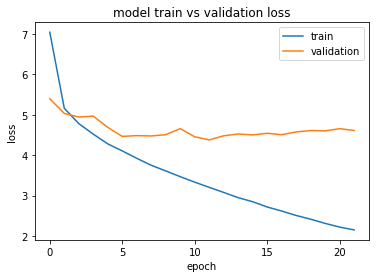

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 1, 50)             287700    
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
gru_9 (GRU)                  (None, 1, 50)             15300     
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
gru_10 (GRU)                 (None, 1, 50)             15300     
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
gru_11 (GRU)                 (None, 50)               

In [54]:
#X_test=X_test.values
X_test=X_test.astype('float32')
X_test=scaler.transform(X_test)

In [55]:
X_test.shape

(6683, 1866)

In [56]:
X_test= np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [57]:
X_test.shape

(6683, 1, 1866)

In [58]:
Prediction = model.predict(X_test)
Prediction

array([[41.278923],
       [27.997562],
       [13.494754],
       ...,
       [37.57325 ],
       [18.284544],
       [18.073492]], dtype=float32)

In [59]:
testScore = math.sqrt(mean_squared_error(y_fortest, Prediction))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 5.10 RMSE


In [60]:
y_fortest

0       40.0
1       28.0
2       12.0
3       35.0
4       28.8
        ... 
6678    39.0
6679    10.0
6680    30.6
6681    20.0
6682    16.0
Name: Milk, Length: 6683, dtype: float64

In [61]:
from numpy import ndarray
import numpy as np
compare=np.zeros(5,int)
#0-2,3-5,6-8,9-11,11以上
#print(compare[0])
#print(compare[1])
#print(compare[2])
#print(compare[3])
#print(compare[4])

In [62]:
y=0
for i in range(6683):
  temp=y_fortest[i]-Prediction[i]
  num=abs(temp)
  if num>0 and num<=2:
    compare[0]=compare[0]+1
  elif num>2 and num <=5:
    compare[1]=compare[1]+1
  elif num>5 and num <=8:
    compare[2]=compare[2]+1
  elif num>8 and num <=11:
    compare[3]=compare[3]+1
  elif num>11:
    compare[4]=compare[4]+1

In [63]:
print(compare[0],compare[1],compare[2],compare[3],compare[4])

2718 2346 932 374 313


<BarContainer object of 5 artists>

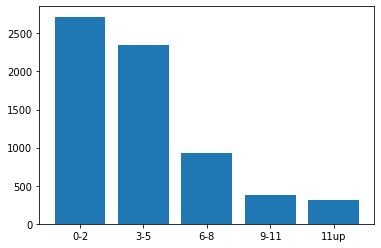

In [64]:
import matplotlib.pyplot as plt
x_ray=['0-2','3-5','6-8','9-11','11up']
plt.bar(x_ray, compare, label = 'compare')


<BarContainer object of 5 artists>


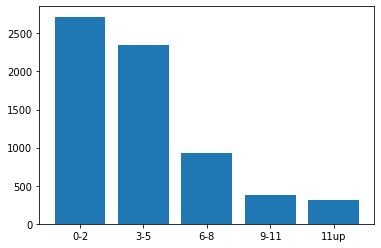

In [65]:
print(plt.bar(x_ray, compare, label = 'compare'))

In [66]:
import pandas as pd
#字典中的key值即為csv中列名
dataframe = pd.DataFrame({'y_true':list(y_fortest),'prediction':list(Prediction)})
#dataframe = pd.DataFrame({'prediction':data})
#將DataFrame儲存為csv,index表示是否顯示行名，default=True
dataframe.to_csv("testPrediction.csv",index=False,sep=',')

In [67]:
from keras.models import load_model

model.save('0902_4.88.h5')  # creates a HDF5 file 'model.h5'